### Packages

In [1]:
import pandas as pkg_pandas
from matplotlib import pyplot as pkg_plot
from sklearn import linear_model as pkg_linear_model
from sklearn import model_selection as pkg_model_selection

### Raw Data

#### Pre-Work

In [2]:
baseline_df = pkg_pandas.read_csv("../data/cbex-hr-analytics-raw.csv")
baseline_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### Plot: Satisfaction Level (x-axis) x Retention Failure (y-axis)

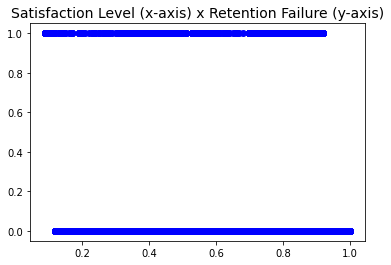

In [3]:
%matplotlib inline
pkg_plot.title(label='Satisfaction Level (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.satisfaction_level, baseline_df.left, color='blue', marker='o')

#### Plot: Last Evaluation (x-axis) x Retention Failure (y-axis)

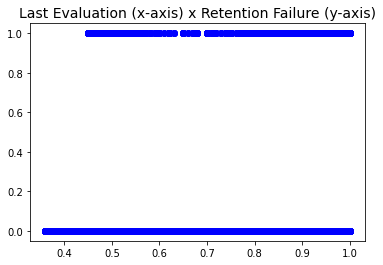

In [4]:
%matplotlib inline
pkg_plot.title(label='Last Evaluation (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.last_evaluation, baseline_df.left, color='blue', marker='o')

#### Plot: Project Number (x-axis) x Retention Failure (y-axis)

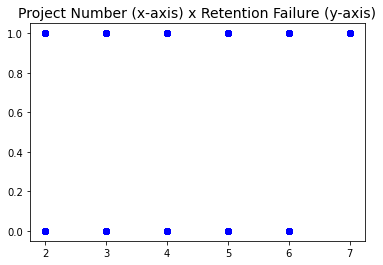

In [5]:
%matplotlib inline
pkg_plot.title(label='Project Number (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.number_project, baseline_df.left, color='blue', marker='o')

#### Plot: Working Hours (x-axis) x Retention Failure (y-axis)

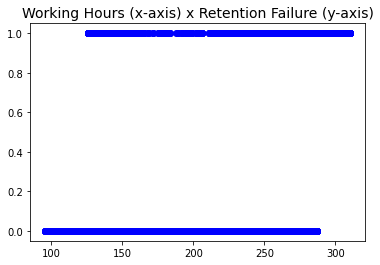

In [6]:
%matplotlib inline
pkg_plot.title(label='Working Hours (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.average_montly_hours, baseline_df.left, color='blue', marker='o')

#### Plot: Service Period (x-axis) x Retention Failure (y-axis)

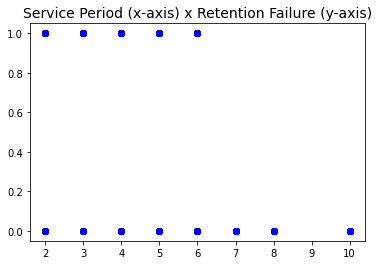

In [7]:
%matplotlib inline
pkg_plot.title(label='Service Period (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.time_spend_company, baseline_df.left, color='blue', marker='o')

#### Plot: Promotion in Last 5-Years (x-axis) x Retention Failure (y-axis)

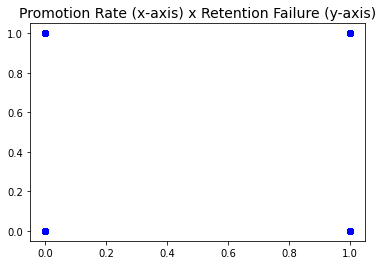

In [8]:
%matplotlib inline
pkg_plot.title(label='Promotion Rate (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.promotion_last_5years, baseline_df.left, color='blue', marker='o')

#### Plot: Department (x-axis) x Retention Failure (y-axis)

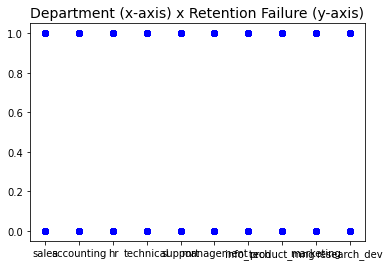

In [9]:
%matplotlib inline
pkg_plot.title(label='Department (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.department, baseline_df.left, color='blue', marker='o')

#### Plot: Salary Range (x-axis) x Retention Failure (y-axis)

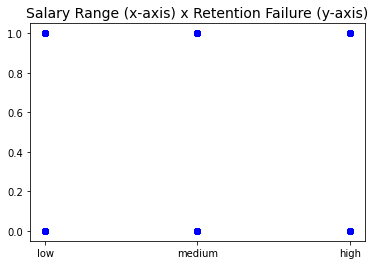

In [10]:
%matplotlib inline
pkg_plot.title(label='Salary Range (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.salary, baseline_df.left, color='blue', marker='o')

### Group By

#### Pre-Work

In [11]:
def get_group_employee_retention_ratios(dataset_df, field_names):
    group_name = ",".join(field_names)
    group_ratio_df = pkg_pandas.DataFrame(columns=[group_name,'remained','left'])
    groups = dataset_df.groupby(field_names)
    for group_key, group_value_set in groups:
        sub_groups = group_value_set.groupby(['left'])
        left_count = remained_count = 0
        left_ratio = remained_ratio = 0.00
        for sub_group_key, sub_group_value_set in sub_groups:
            if (sub_group_key == 0): remained_count = len(sub_group_value_set)
            if (sub_group_key == 1): left_count = len(sub_group_value_set)
        remained_ratio = remained_count * 100 / (left_count + remained_count)
        left_ratio = left_count * 100 / (left_count + remained_count)
        group_ratio_df.loc[len(group_ratio_df)] = [group_key, remained_ratio, left_ratio]

    return group_ratio_df

#### Group By: Salary

In [12]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, field_names=['salary'])
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-salary-employee-retentions.csv", index=False)
ratio_df

,salary,remained,left
0,high,93.371059,6.628941
1,low,70.311646,29.688354
2,medium,79.568725,20.431275


<AxesSubplot:title={'center':'Salary Ranges (x-axis) Vs. Employee Retention Ratios (y-axis)'}, xlabel='salary'>

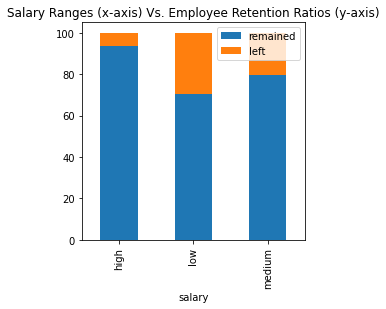

In [13]:
ratio_df.plot(x='salary', kind='bar', stacked=True, \
    title='Salary Ranges (x-axis) Vs. Employee Retention Ratios (y-axis)', figsize=(4,4))

**Observations (Salary):**
- Employees with high salary have low attrition rate: ~7%
- Employees with low salary have high attrition rate: ~30%
- Employee salary has _definitive influence_ on attrition

#### Group By: Department

In [14]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, field_names=['department'])
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-department-employee-retentions.csv", index=False)
ratio_df

,department,remained,left
0,accounting,73.402868,26.597132
1,hr,70.906631,29.093369
2,info_tech,77.750611,22.249389
3,management,85.555556,14.444444
4,marketing,76.340326,23.659674
5,product_mng,78.048780,21.951220
6,research_dev,84.625159,15.374841
7,sales,75.507246,24.492754
8,support,75.100942,24.899058
9,technical,74.375000,25.625000


<AxesSubplot:title={'center':'Departments (x-axis) Vs. Employee Retention Ratios (y-axis)'}, xlabel='department'>

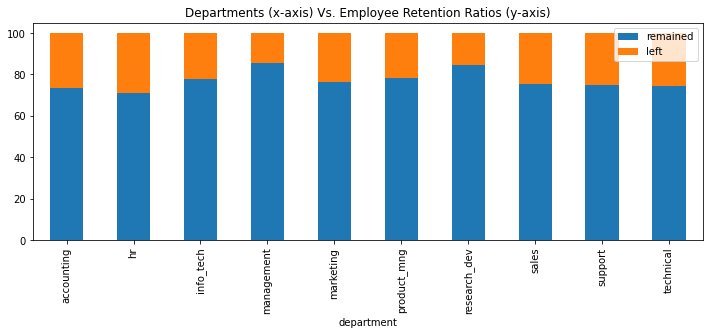

In [15]:
ratio_df.plot(x='department', kind='bar', stacked=True, \
    title='Departments (x-axis) Vs. Employee Retention Ratios (y-axis)', figsize=(12,4))

**Observations (Department)**:
- Employees in Research and Development, Management departments have low attrition rate: ~15%
- Employees in HR department have high attrition rate: ~29%
- Deparment work style may be the contributor for attrition

#### Group By: Project Number

In [16]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, field_names=['number_project'])
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-project-employee-retentions.csv", index=False)
ratio_df

,number_project,remained,left
0,2.0,34.380235,65.619765
1,3.0,98.224414,1.775586
2,4.0,90.630011,9.369989
3,5.0,77.834118,22.165882
4,6.0,44.207836,55.792164
5,7.0,0.000000,100.000000


<AxesSubplot:title={'center':'Project Number (x-axis) Vs. Employee Retention Ratios (y-axis)'}, xlabel='number_project'>

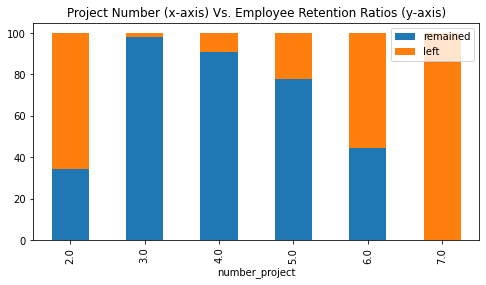

In [17]:
ratio_df.plot(x='number_project', kind='bar', stacked=True, \
    title='Project Number (x-axis) Vs. Employee Retention Ratios (y-axis)', figsize=(8,4))

**Observations (Project Number)**:
- Employess of project 7 show very high attrition rate: ~100%
- Employees of projects 2,6 have high attrition rate: ~55-65%
- Employees of project 3 has very low attrition rate: ~2%
- Kudos to project 3 :thumbs_up:

#### Group By: Service Period

In [18]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, field_names=['time_spend_company'])
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-service-period-employee-retentions.csv", index=False)
ratio_df

,time_spend_company,remained,left
0,2.0,98.366215,1.633785
1,3.0,75.384138,24.615862
2,4.0,65.193586,34.806414
3,5.0,43.448744,56.551256
4,6.0,70.891365,29.108635
5,7.0,100.000000,0.000000
6,8.0,100.000000,0.000000
7,10.0,100.000000,0.000000


<AxesSubplot:title={'center':'Service Period (x-axis) Vs. Employee Retention Ratios (y-axis)'}, xlabel='time_spend_company'>

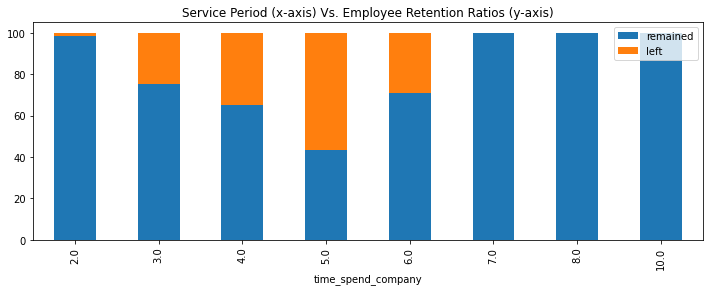

In [19]:
ratio_df.plot(x='time_spend_company', kind='bar', stacked=True, \
    title='Service Period (x-axis) Vs. Employee Retention Ratios (y-axis)', figsize=(12,4))

**Observations (Service Period)**:
- Employees who served less than 2 years have low attrition rate: ~2%
- Employees who served more than 7 years have have very low attrition rate: ~0%
- Employees who served 5 years have very high attrition rate: ~57%
- Employees who served 3,4,6 years have moderate attrition rate: ~24%-34%

#### Group By: Promoted

In [20]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, field_names=['promotion_last_5years'])
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-promoted-employee-retentions.csv", index=False)
ratio_df

,promotion_last_5years,remained,left
0,0.0,75.803815,24.196185
1,1.0,94.043887,5.956113


<AxesSubplot:title={'center':'Promoted (x-axis) Vs. Employee Retention Ratios (y-axis)'}, xlabel='promotion_last_5years'>

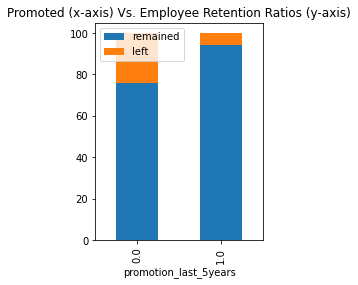

In [21]:
ratio_df.plot(x='promotion_last_5years', kind='bar', stacked=True, \
    title='Promoted (x-axis) Vs. Employee Retention Ratios (y-axis)', figsize=(3,4))

**Observations (Promoted):**
- Employees promoted in last 5 years have low attrition rate: ~6%
- Employees not promoted in last 5 years have high attrition rate: ~24% 

#### Group By: Work Accident

In [22]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, field_names=['work_accident'])
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-work-accident-employee-retentions.csv", index=False)
ratio_df

,work_accident,remained,left
0,0.0,73.484022,26.515978
1,1.0,92.208391,7.791609


<AxesSubplot:title={'center':'Work Accident (x-axis) Vs. Employee Retention Ratios (y-axis)'}, xlabel='work_accident'>

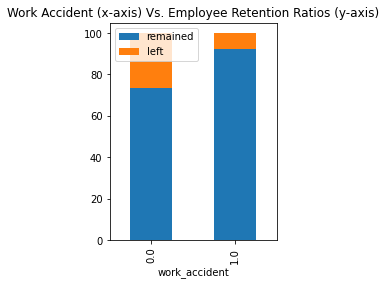

In [23]:
ratio_df.plot(x='work_accident', kind='bar', stacked=True, \
    title='Work Accident (x-axis) Vs. Employee Retention Ratios (y-axis)', figsize=(3,4))

**Observations (Work Accident):**
- Employees who had an accident at work, have low attrition rate: ~8%
- Employees who have not had an accident at work, have moderate attrition rate: ~26%
- Note: This correlation must not be taken literally/seriously

#### Group By: (Department, Salary)

In [24]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, field_names=['department','salary'])
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-department-salary-employee-retentions.csv", index=False)
ratio_df

,"department,salary",remained,left
0,"(accounting, high)",93.243243,6.756757
1,"(accounting, low)",72.346369,27.653631
2,"(accounting, medium)",70.149254,29.850746
3,"(hr, high)",86.666667,13.333333
4,"(hr, low)",72.537313,27.462687
5,"(hr, medium)",67.409471,32.590529
6,"(info_tech, high)",95.180723,4.819277
7,"(info_tech, low)",71.756979,28.243021
8,"(info_tech, medium)",81.869159,18.130841
9,"(management, high)",99.555556,0.444444


<AxesSubplot:title={'center':'(Department, Salary) (x-axis) Vs. Employee Retention Ratios (y-axis)'}, xlabel='department,salary'>

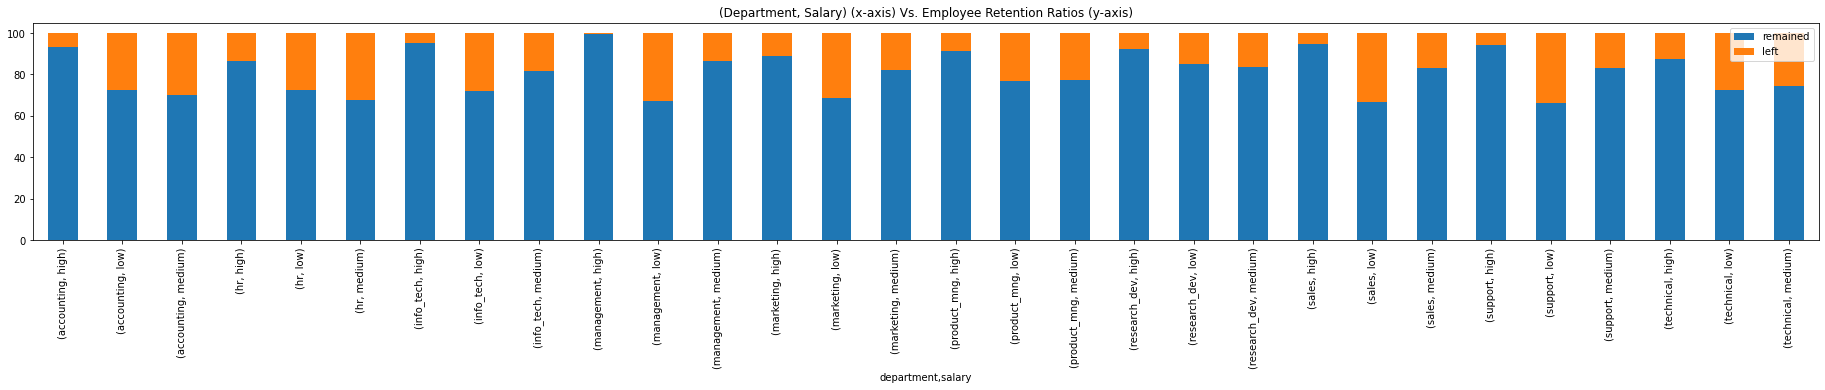

In [25]:
ratio_df.plot(x='department,salary', kind='bar', stacked=True, \
    title='(Department, Salary) (x-axis) Vs. Employee Retention Ratios (y-axis)', figsize=(32,4))

**Observations (Department, Salary):**
- Employees of Research and Development, Product Management, Technical, HR, Accounting departments show similar attrition rates across low or medium salary ranges

#### Group By: (Service Period, Salary)

In [26]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, field_names=['time_spend_company','salary'])
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-service-period-salary-employee-retentions.csv", index=False)
ratio_df

,"time_spend_company,salary",remained,left
0,"(2, high)",100.000000,0.000000
1,"(2, low)",98.559267,1.440733
2,"(2, medium)",97.807638,2.192362
3,"(3, high)",91.153846,8.846154
4,"(3, low)",69.235569,30.764431
5,"(3, medium)",79.617366,20.382634
6,"(4, high)",90.751445,9.248555
7,"(4, low)",58.384615,41.615385
8,"(4, medium)",69.280443,30.719557
9,"(5, high)",69.696970,30.303030


<AxesSubplot:title={'center':'(Service Period, Salary) (x-axis) Vs. Employee Retention Ratios (y-axis)'}, xlabel='time_spend_company,salary'>

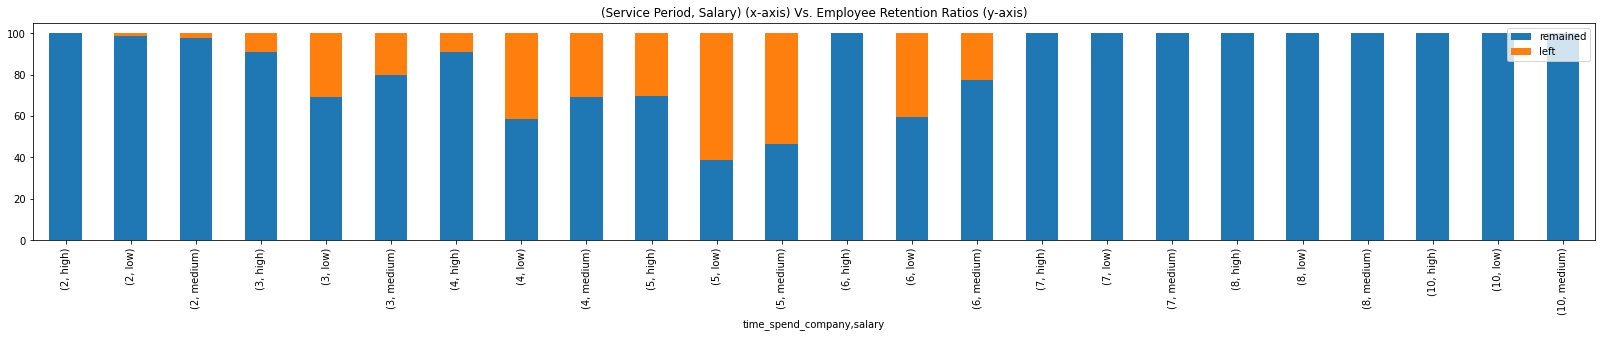

In [27]:
ratio_df.plot(x='time_spend_company,salary', kind='bar', stacked=True, \
    title='(Service Period, Salary) (x-axis) Vs. Employee Retention Ratios (y-axis)', figsize=(28,4))

**Observations (Service Period, Salary):**
- Employees who served 3,4,6 years with better salary show reduction in attrition rate
- Employees who served 5 years with better salary do not show much reduction in attrition rate

#### Group By: (Promoted, Salary)

In [28]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, field_names=['promotion_last_5years','salary'])
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-promoted-salary-employee-retentions.csv", index=False)
ratio_df

,"promotion_last_5years,salary",remained,left
0,"(0, high)",92.961373,7.038627
1,"(0, low)",70.234483,29.765517
2,"(0, medium)",79.058260,20.941740
3,"(1, high)",100.000000,0.000000
4,"(1, low)",78.787879,21.212121
5,"(1, medium)",97.237569,2.762431


<AxesSubplot:title={'center':'(Promoted, Salary) (x-axis) Vs. Employee Retention Ratios (y-axis)'}, xlabel='promotion_last_5years,salary'>

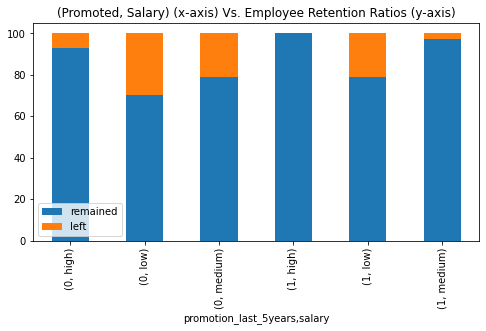

In [29]:
ratio_df.plot(x='promotion_last_5years,salary', kind='bar', stacked=True, \
    title='(Promoted, Salary) (x-axis) Vs. Employee Retention Ratios (y-axis)', figsize=(8,4))

**Observations (Promoted, Salary):**
- Employees with high salary show low attrition rate in spite of no promotions
- Employees with medium salary show reduced attrition rate with promotions
- Employees with low salary show reduced attrition rate with promotions

#### Group By: (Promoted, Service Period)

In [30]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, field_names=['promotion_last_5years','time_spend_company'])
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-promoted-service-period-employee-retentions.csv", index=False)
ratio_df

,"promotion_last_5years,time_spend_company",remained,left
0,"(0, 2)",98.338558,1.661442
1,"(0, 3)",75.099065,24.900935
2,"(0, 4)",64.829500,35.170500
3,"(0, 5)",42.857143,57.142857
4,"(0, 6)",70.185449,29.814551
5,"(0, 7)",100.000000,0.000000
6,"(0, 8)",100.000000,0.000000
7,"(0, 10)",100.000000,0.000000
8,"(1, 2)",100.000000,0.000000
9,"(1, 3)",88.805970,11.194030


<AxesSubplot:title={'center':'(Promoted, Service Period) (x-axis) Vs. Employee Retention Ratios (y-axis)'}, xlabel='promotion_last_5years,time_spend_company'>

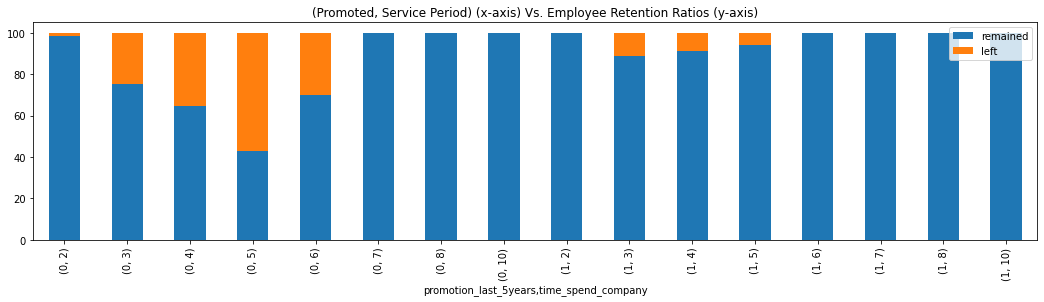

In [31]:
ratio_df.plot(x='promotion_last_5years,time_spend_company', kind='bar', stacked=True, \
    title='(Promoted, Service Period) (x-axis) Vs. Employee Retention Ratios (y-axis)', figsize=(18,4))

**Observations (Promoted, Service Period):**
- Light bulb moment :)
- Employees who served 3,4,5,6 show significant reduction in attrition rate when promoted

### Encode: Dummy or One Hot

**Encode**: Encode non-numerical value columns into dummy-variable columns

#### Pre-Work

In [32]:
def get_filed_dummies(dataset_df, field_name):
    field_dummies = pkg_pandas.get_dummies(dataset_df[field_name])

    field_values = field_dummies.columns
    print("DEBUG:: get_field_dummies: value count = {}".format(len(field_values)))
    print("DEBUG:: get_field_dummies: values = {}".format(field_values))
    field_value_map = {}

    for i in range(len(field_values)):
        field_value_map[field_values[i]] = field_name + "_" + field_values[i]

    field_dummies = field_dummies.rename(columns=field_value_map)
    field_dummies = field_dummies.drop(field_value_map[field_values[0]], axis='columns')
    print("DEBUG:: get_field_dummies: drop (first) value = {}".format(field_values[0]))
    return field_dummies

In [33]:
def dummy_encode_field(dataset_df, field_name):
    encoded_dataset_df = dataset_df
    field_dummies = get_filed_dummies(dataset_df=encoded_dataset_df, field_name=field_name)
    encoded_dataset_df = encoded_dataset_df.drop([field_name],axis='columns')
    encoded_dataset_df = pkg_pandas.concat([encoded_dataset_df,field_dummies],axis='columns')
    return encoded_dataset_df

In [34]:
# Initialize
encoded_baseline_df = baseline_df

#### Encode: Department

In [35]:
encoded_baseline_df = dummy_encode_field(encoded_baseline_df, 'department')
encoded_baseline_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-encoded-departments.csv", index=False)
encoded_baseline_df

DEBUG:: get_field_dummies: value count = 10
DEBUG:: get_field_dummies: values = Index(['accounting', 'hr', 'info_tech', 'management', 'marketing',
       'product_mng', 'research_dev', 'sales', 'support', 'technical'],
      dtype='object')
DEBUG:: get_field_dummies: drop (first) value = accounting


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_hr,department_info_tech,department_management,department_marketing,department_product_mng,department_research_dev,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,low,0,0,0,0,0,0,0,1,0


#### Encode: Salary

In [36]:
encoded_baseline_df = dummy_encode_field(encoded_baseline_df, 'salary')
encoded_baseline_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-encoded-salaries.csv", index=False)
encoded_baseline_df

DEBUG:: get_field_dummies: value count = 3
DEBUG:: get_field_dummies: values = Index(['high', 'low', 'medium'], dtype='object')
DEBUG:: get_field_dummies: drop (first) value = high


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_hr,department_info_tech,department_management,department_marketing,department_product_mng,department_research_dev,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


### Model: Logistic Regression

#### Pre-Work

In [37]:
#train_inputs, test_inputs, train_outputs, test_outputs = \
#    pkg_model_selection.train_test_split(baseline_inputs, baseline_outputs, test_size=0.20, random_state = 33)

#print("=== Baseline Split - Train and Test ===")
#print("Lengths: Baseline = {}, Train = {}, Test = {}".format(len(baseline_inputs), len(train_inputs), len(test_inputs)))

#### Model: Salary